# 미술관과 코로나 19 확진자 수 간의 상관분석

- 상관분석 : 두 변수 간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지 분석하는 방법
- 상관관계 : 두 변수 간의 관계의 강도
- 상관계수 : 상관관계의 정도를 파악하는 것, 두 변수 간의 연관된 정보를 나타낼 뿐 인과 관계를 설명하는 것은 아님 

- 상관계수가 0인 경우 : 두 변수간의 관계가 없다

- 미술관 20년 1-9월, 21년 1-9월 관람객수와 코로나19 확진자 수 간의 상관분석

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# skiprows 로 원하지 않는 행 제거
art_df_20 = pd.read_excel('미술관, 박물관.xlsx', sheet_name='미술관 20', skiprows = [0])
art_df_21 = pd.read_excel('미술관, 박물관.xlsx', sheet_name='미술관 21', skiprows = [0])

In [4]:
# concat을 위해 컬럼명 변경 
art_df_20 = art_df_20.rename(columns={'2020년 코로나 확진자 수':'코로나 확진자 수'})
art_df_21 = art_df_21.rename(columns={'2021년 코로나 확진자 수':'코로나 확진자 수'})

## 2020 ~ 2021 코로나 19 확진자 수와 방문객 수에 대한 상관 분석

In [5]:
# 2020 + 2021 
test_df = pd.concat([art_df_20, art_df_21], axis = 0)

In [6]:
# 합계와 코로나 확진자 수에 대한 상관관계
test_df['합계'].corr(test_df['코로나 확진자 수'])

0.47025488183844744

## 상관계수의 검증

### 2020-2021 미술관 

- x : 총 관람객 수
- y : 코로나 확진자 수

In [9]:
x = test_df['합계'].values
y = test_df['코로나 확진자 수'].values

cov = (np.sum(x*y) - len(x)*np.mean(x)*np.mean(y)) / len(x)
cov

446056111.8086421

In [10]:
# 공분산을 표준화 시킨 상관계수
np.corrcoef(x, y)[0, 1]

0.47025488183844744

In [11]:
# (상관계수, p-value)
stats.pearsonr(x, y)

(0.47025488183844755, 0.04891057851798633)

## 시각화 

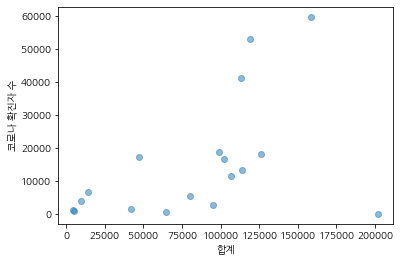

In [12]:
plt.scatter(x, y, alpha = 0.5)
plt.xlabel('합계')
plt.ylabel('코로나 확진자 수')
plt.show()

<AxesSubplot:>

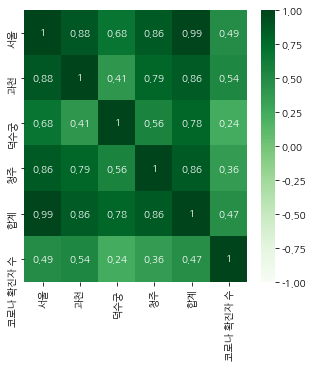

In [13]:
#heatmap으로 상관관계를 표시
plt.rcParams["figure.figsize"] = (5,5)
sns.heatmap(test_df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

##  지역별 미술관 관람객수와 코로나19 확진자 수 간의 상관분석

In [14]:
# 특정 필드에 대한 상관관계
art_df_20['합계'].corr(art_df_20['코로나 확진자 수'])

-0.3162204005639777

In [15]:
# 특정 필드에 대한 상관관계
art_df_21['합계'].corr(art_df_21['코로나 확진자 수'])

0.5792859425739834

In [16]:
# 피어슨 상관계수
corr_20 = art_df_20.corr(method = 'pearson')
corr_20

,서울,과천,덕수궁,청주,합계,코로나 확진자 수
서울,1.000000,0.868593,0.837093,0.891383,0.991896,-0.356460
과천,0.868593,1.000000,0.547815,0.807293,0.850488,-0.114598
덕수궁,0.837093,0.547815,1.000000,0.746824,0.887932,-0.265744
청주,0.891383,0.807293,0.746824,1.000000,0.904468,-0.338669
합계,0.991896,0.850488,0.887932,0.904468,1.000000,-0.316220
코로나 확진자 수,-0.356460,-0.114598,-0.265744,-0.338669,-0.316220,1.000000


In [17]:
# 피어슨 상관계수
corr_21 = art_df_21.corr(method = 'pearson')
corr_21

,서울,과천,덕수궁,청주,합계,코로나 확진자 수
서울,1.000000,0.705426,0.578874,0.534122,0.938415,0.541244
과천,0.705426,1.000000,0.363979,0.589081,0.730594,0.219573
덕수궁,0.578874,0.363979,1.000000,0.035645,0.804093,0.514361
청주,0.534122,0.589081,0.035645,1.000000,0.461462,0.428324
합계,0.938415,0.730594,0.804093,0.461462,1.000000,0.579286
코로나 확진자 수,0.541244,0.219573,0.514361,0.428324,0.579286,1.000000


## 상관계수의 검증

### 2020 미술관 
- x : 총 관람객 수
- y : 코로나 확진자 수

In [18]:
x = art_df_20['합계']
y = art_df_20['코로나 확진자 수']

cov = (np.sum(x*y) - len(x)*np.mean(x)*np.mean(y)) / len(x)
cov

-42537362.55555555

In [19]:
# 공분산을 표준화 시킨 상관계수
np.corrcoef(x, y)[0, 1]

-0.3162204005639777

In [20]:
# (상관계수, p-value)
stats.pearsonr(x, y)

(-0.3162204005639777, 0.4070953523133377)

### 2021 미술관 
- x : 총 관람객 수
- y : 코로나 확진자 수

In [21]:
x = art_df_21['합계']
y = art_df_21['코로나 확진자 수']

cov = (np.sum(x*y) - len(x)*np.mean(x)*np.mean(y)) / len(x)
cov

278444526.1975305

In [22]:
# 공분산을 표준화 시킨 상관계수
np.corrcoef(x, y)[0, 1]

0.5792859425739834

## 시각화

<AxesSubplot:>

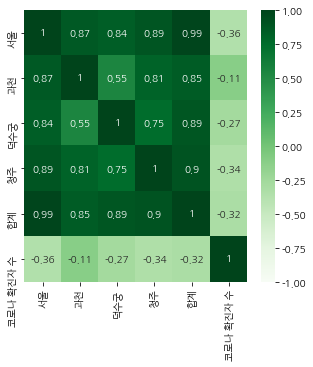

In [24]:
#heatmap으로 상관관계를 표시

plt.rcParams["figure.figsize"] = (5,5)
sns.heatmap(art_df_20.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

<AxesSubplot:>

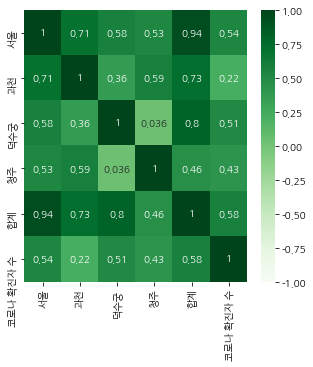

In [25]:
plt.rcParams["figure.figsize"] = (5,5)
sns.heatmap(art_df_21.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

# 박물관과 코로나 19 확진자 수 간의 상관분석

In [26]:
# skiprows 로 원하지 않는 행 제거
m_df_20 = pd.read_excel('미술관, 박물관.xlsx', sheet_name='박물관 20')
m_df_21 = pd.read_excel('미술관, 박물관.xlsx', sheet_name='박물관 21')

In [27]:
# float -> str
m_df_20['날짜'] =  m_df_20['날짜'].astype(str)
m_df_21['날짜'] =  m_df_21['날짜'].astype(str)

In [28]:
# na값 0으로 변경
m_df_20 = m_df_20.fillna(0)

## 2020-2021 박물관의 상관분석

In [29]:
m_df_20 = m_df_20.rename(columns={'2020년 코로나 확진자 수':'코로나 확진자 수'})
m_df_21 = m_df_21.rename(columns={'2021년 코로나 확진자 수':'코로나 확진자 수'})

In [30]:
t_df = pd.concat([m_df_20, m_df_21], axis= 0)

In [31]:
# 특정 필드에 대한 상관관계
t_df['합계'].corr(t_df['코로나 확진자 수'])

0.16783863164428992

## 상관계수의 검증

### 2020-2021 박물관
- x : 총 관람객 수
- y : 코로나 확진자 수

In [32]:
x = t_df['합계'].values
y = t_df['코로나 확진자 수'].values

cov = (np.sum(x*y) - len(x)*np.mean(x)*np.mean(y)) / len(x)
cov

634758647.8456794

In [33]:
# 공분산을 표준화 시킨 상관계수
np.corrcoef(x, y)[0, 1]

0.16783863164428992

In [34]:
# (상관계수, p-value)
stats.pearsonr(x, y)

(0.16783863164428992, 0.5055993803240206)

## 시각화

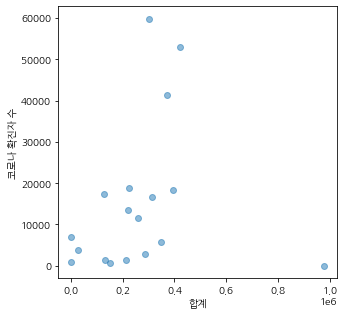

In [35]:
plt.scatter(x, y, alpha = 0.5)
plt.xlabel('합계')
plt.ylabel('코로나 확진자 수')
plt.show()

<AxesSubplot:>

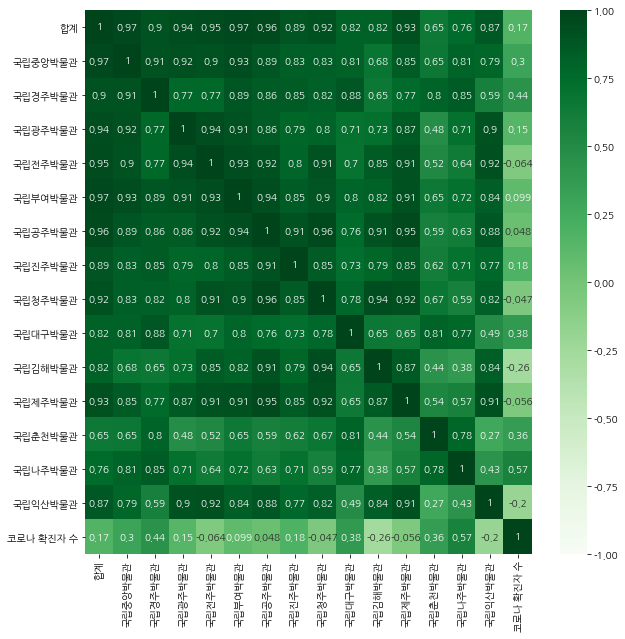

In [37]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(t_df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

##  지역별 미술관 관람객수와 코로나19 확진자 수 간의 상관분석

In [39]:
# 특정 필드에 대한 상관관계
m_df_20['합계'].corr(m_df_20['코로나 확진자 수'])

-0.372248637311533

In [40]:
# 특정 필드에 대한 상관관계
m_df_21['합계'].corr(m_df_21['코로나 확진자 수'])

0.5236252388635971

In [41]:
# 피어슨 상관계수
m_df_20 = m_df_20.corr(method = 'pearson')
m_df_20

,합계,국립중앙박물관,국립경주박물관,국립광주박물관,국립전주박물관,국립부여박물관,국립공주박물관,국립진주박물관,국립청주박물관,국립대구박물관,국립김해박물관,국립제주박물관,국립춘천박물관,국립나주박물관,국립익산박물관,코로나 확진자 수
합계,1.000000,0.987983,0.934559,0.947702,0.986276,0.979985,0.984870,0.965533,0.945991,0.904452,0.946579,0.991288,0.627871,0.939423,0.967191,-0.372249
국립중앙박물관,0.987983,1.000000,0.892632,0.948358,0.980247,0.957653,0.957665,0.921387,0.899852,0.850217,0.896263,0.967419,0.554962,0.904261,0.972449,-0.342953
국립경주박물관,0.934559,0.892632,1.000000,0.792577,0.879220,0.946818,0.978151,0.965905,0.959923,0.937992,0.968879,0.941026,0.737343,0.881644,0.823706,-0.223513
국립광주박물관,0.947702,0.948358,0.792577,1.000000,0.973780,0.923359,0.885528,0.864303,0.822996,0.759551,0.825636,0.940219,0.453157,0.922998,0.992129,-0.428890
국립전주박물관,0.986276,0.980247,0.879220,0.973780,1.000000,0.948229,0.954999,0.922948,0.915734,0.857525,0.915794,0.968188,0.539934,0.936960,0.985637,-0.400006
국립부여박물관,0.979985,0.957653,0.946818,0.923359,0.948229,1.000000,0.974587,0.968034,0.915093,0.876953,0.933343,0.982377,0.612875,0.909720,0.942899,-0.310570
국립공주박물관,0.984870,0.957665,0.978151,0.885528,0.954999,0.974587,1.000000,0.981617,0.975273,0.941286,0.981721,0.977669,0.678622,0.917271,0.915066,-0.315261
국립진주박물관,0.965533,0.921387,0.965905,0.864303,0.922948,0.968034,0.981617,1.000000,0.975686,0.963930,0.979162,0.976234,0.761712,0.916614,0.887619,-0.396011
국립청주박물관,0.945991,0.899852,0.959923,0.822996,0.915734,0.915093,0.975273,0.975686,1.000000,0.984537,0.991445,0.946414,0.778698,0.912881,0.849625,-0.391392
국립대구박물관,0.904452,0.850217,0.937992,0.759551,0.857525,0.876953,0.941286,0.963930,0.984537,1.000000,0.970354,0.917026,0.845882,0.880537,0.786396,-0.415806


In [42]:
# 피어슨 상관계수
m_df_21 = m_df_21.corr(method = 'pearson')
m_df_21

,합계,국립중앙박물관,국립경주박물관,국립광주박물관,국립전주박물관,국립부여박물관,국립공주박물관,국립진주박물관,국립청주박물관,국립대구박물관,국립김해박물관,국립제주박물관,국립춘천박물관,국립나주박물관,국립익산박물관,코로나 확진자 수
합계,1.000000,0.989247,0.969913,0.897550,0.768182,0.893344,0.826979,0.754084,0.805565,0.726170,-0.356511,0.483184,0.922763,0.885379,0.543625,0.523625
국립중앙박물관,0.989247,1.000000,0.968524,0.882481,0.734744,0.854548,0.792090,0.751911,0.779328,0.632751,-0.461294,0.517834,0.905168,0.870293,0.585642,0.542917
국립경주박물관,0.969913,0.968524,1.000000,0.925701,0.683755,0.796638,0.809836,0.785314,0.716624,0.653830,-0.490322,0.440940,0.871982,0.884328,0.430004,0.687026
국립광주박물관,0.897550,0.882481,0.925701,1.000000,0.763616,0.752148,0.594829,0.688768,0.610859,0.732167,-0.334401,0.116527,0.841062,0.867786,0.201422,0.566187
국립전주박물관,0.768182,0.734744,0.683755,0.763616,1.000000,0.921544,0.442304,0.234558,0.845230,0.666997,0.043463,0.246470,0.859561,0.624306,0.164999,-0.003763
국립부여박물관,0.893344,0.854548,0.796638,0.752148,0.921544,1.000000,0.729563,0.447730,0.949147,0.727922,-0.017901,0.481047,0.922406,0.727899,0.413270,0.167568
국립공주박물관,0.826979,0.792090,0.809836,0.594829,0.442304,0.729563,1.000000,0.697269,0.741686,0.605279,-0.296541,0.629801,0.756618,0.732576,0.553866,0.623469
국립진주박물관,0.754084,0.751911,0.785314,0.688768,0.234558,0.447730,0.697269,1.000000,0.287928,0.562200,-0.386512,0.294160,0.485397,0.760995,0.554560,0.731073
국립청주박물관,0.805565,0.779328,0.716624,0.610859,0.845230,0.949147,0.741686,0.287928,1.000000,0.586126,-0.088767,0.561684,0.881725,0.577010,0.402452,0.146538
국립대구박물관,0.726170,0.632751,0.653830,0.732167,0.666997,0.727922,0.605279,0.562200,0.586126,1.000000,0.189893,-0.023642,0.658313,0.606194,0.238952,0.217530


## 상관계수의 검증

### 2020 박물관
- x : 총 관람객 수
- y : 코로나 확진자 수

In [43]:
x = m_df_20['합계']
y = m_df_20['코로나 확진자 수']

cov = (np.sum(x*y) - len(x)*np.mean(x)*np.mean(y)) / len(x)
cov

-0.10457963402306367

In [44]:
# 공분산을 표준화 시킨 상관계수
np.corrcoef(x, y)[0, 1]

-0.9450058789553576

In [45]:
# (상관계수, p-value)
stats.pearsonr(x, y)

(-0.9450058789553575, 3.524952487362718e-08)

### 2021 박물관
- x : 총 관람객 수
- y : 코로나 확진자 수

In [46]:
x = m_df_21['합계']
y = m_df_21['코로나 확진자 수']

cov = (np.sum(x*y) - len(x)*np.mean(x)*np.mean(y)) / len(x)
cov

0.08014490184840711

In [47]:
# 공분산을 표준화 시킨 상관계수
np.corrcoef(x, y)[0, 1]

0.6654136479209497

In [48]:
# (상관계수, p-value)
stats.pearsonr(x, y)

(0.66541364792095, 0.004904936426677613)

## 시각화

<AxesSubplot:>

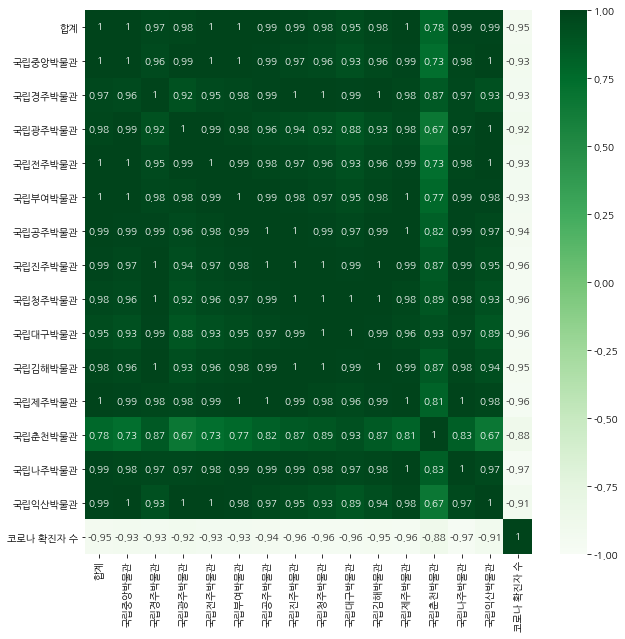

In [49]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(m_df_20.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

<AxesSubplot:>

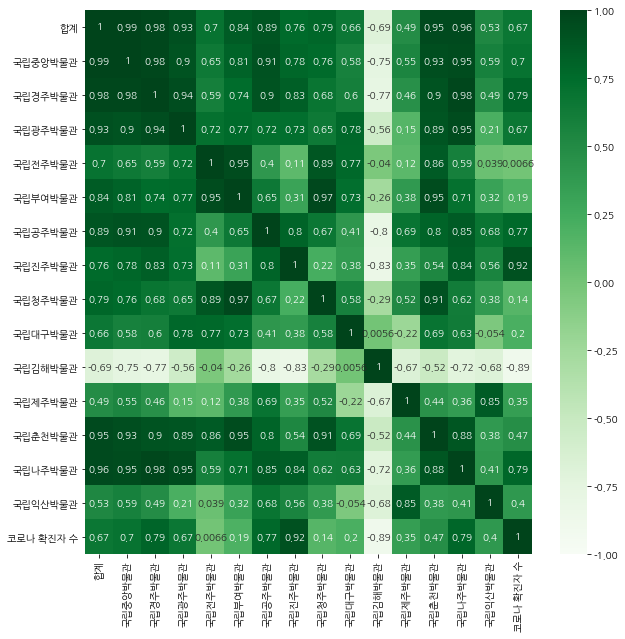

In [50]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(m_df_21.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )